In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.linear_model import LinearRegression
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset
df = pd.read_csv("synthetic_dataset_with_patterns.csv")

# Display the dataset
print("Dataset:\n", df.head())

Dataset:
   Query ID Shard ID Query Type  Data Size (MB)  Execution Time (s)  \
0     Q001  Shard_1       JOIN             506                2.12   
1     Q002  Shard_5     UPDATE             256                2.29   
2     Q003  Shard_2     UPDATE             163                1.31   
3     Q004  Shard_2     SELECT             104                1.80   
4     Q005  Shard_1     SELECT             264                1.93   

   CPU Usage (%)  Memory Usage (MB)  I/O Operations            Timestamp  
0             87                799             149  2025-03-01 10:37:49  
1             73                735             130  2025-03-01 10:44:48  
2             84                687              53  2025-03-01 10:23:08  
3             72                555              87  2025-03-01 10:12:26  
4             67                546              53  2025-03-01 10:46:38  


In [3]:
# Create a binary target variable: 1 if Execution Time > 2.0s, else 0
df['Target'] = (df['Execution Time (s)'] > 2.0).astype(int)

# Features and target
features = ['Data Size (MB)', 'CPU Usage (%)', 'Memory Usage (MB)', 'I/O Operations']
target = 'Target'

X = df[features]
y = df[target]

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [7]:
# Make predictions
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for ROC curve


In [8]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"\nEvaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")


Evaluation Metrics:
Accuracy: 0.87
Precision: 0.90
Recall: 0.80
F1 Score: 0.85


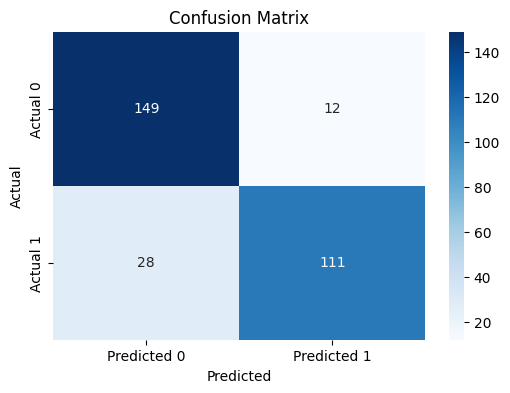

In [9]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

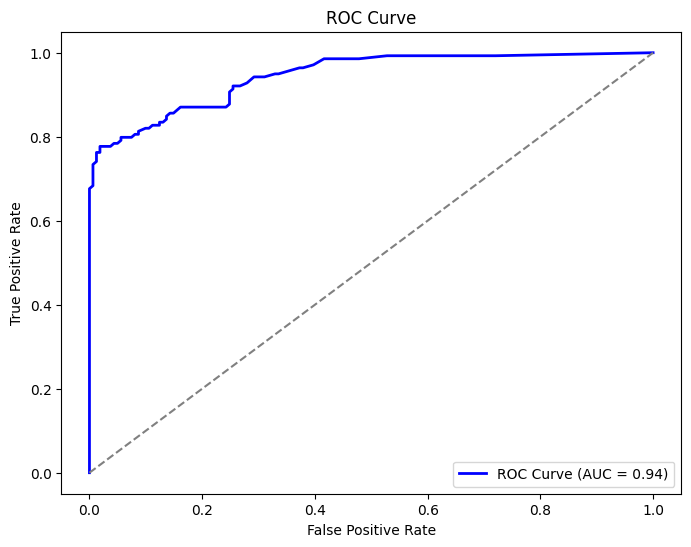

In [10]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

<ipython-input-13-86faf5ddc309>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


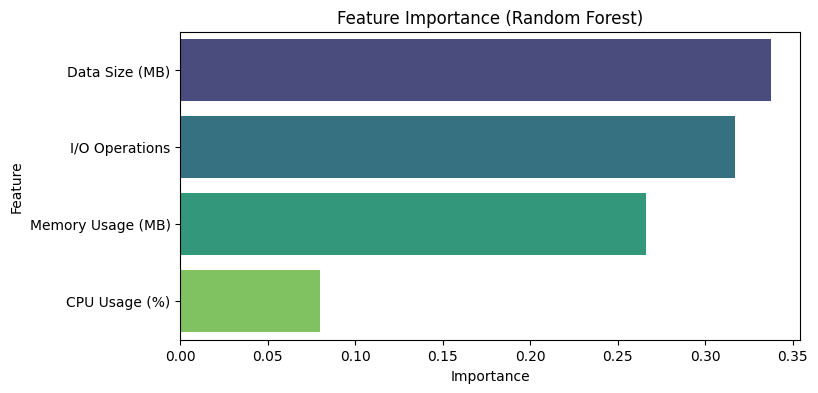

In [13]:
# Feature Importance (Random Forest)
feature_importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

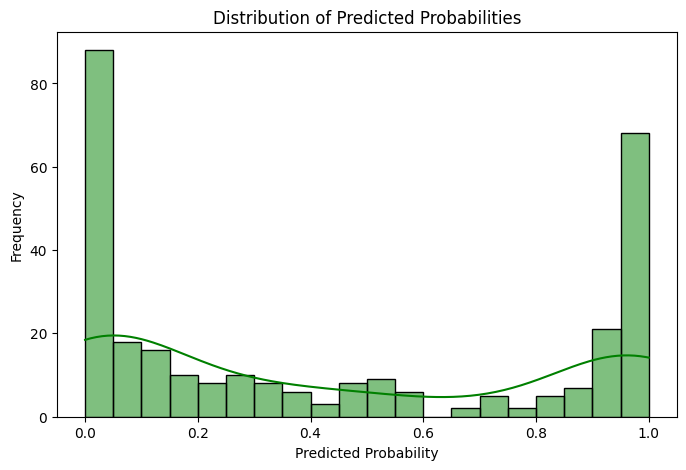

In [15]:
# Distribution of Predicted Probabilities
plt.figure(figsize=(8, 5))
sns.histplot(y_pred_proba, bins=20, kde=True, color='green')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.show()

In [16]:
# Function to simulate Dynamic Sharding Based on Query Load
def dynamic_sharding(df):
    # Simple thresholding to simulate dynamic sharding
    for idx, row in df.iterrows():
        if row['Execution Time (s)'] > 2.0 or row['CPU Usage (%)'] > 75:
            new_shard = f"Shard_{random.randint(1, 5)}"  # Assign a new shard
            df.at[idx, 'Shard ID'] = new_shard  # Update shard ID based on load
    return df

In [19]:
# Simulate a predictive model for Data Growth based on past data (using linear regression)
def predict_data_growth(df):
    df['Timestamp'] = pd.to_datetime(df['Timestamp'])
    df['Timestamp'] = df['Timestamp'].map(lambda x: x.timestamp())  # Convert to Unix timestamp

    X = df[['Timestamp']]  # Features (time)
    y = df['Data Size (MB)']  # Target (data size)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predict future data size (next timestamp)
    future_timestamp = np.array([[df['Timestamp'].max() + 100]])  # Predict for the next time point
    predicted_growth = model.predict(future_timestamp)

    return predicted_growth[0]

In [20]:
# Simulating predictive sharding adjustment based on predicted data growth
def predictive_sharding(df, predicted_growth):
    # Adjust sharding based on the predicted growth in data size
    for idx, row in df.iterrows():
        if row['Data Size (MB)'] + predicted_growth > 500:
            df.at[idx, 'Shard ID'] = f"Shard_{random.randint(1, 5)}"  # Move to a new shard if data is predicted to grow beyond 500 MB
    return df

In [21]:
# Predict future data growth
predicted_growth = predict_data_growth(df)
print(f"\nPredicted Data Growth (next time period): {predicted_growth:.2f} MB")


Predicted Data Growth (next time period): 332.46 MB


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [22]:
# Simulating Dynamic Sharding
df_dynamic_sharded = dynamic_sharding(df.copy())

In [23]:
# Simulating Predictive Sharding
df_predictive_sharded = predictive_sharding(df_dynamic_sharded.copy(), predicted_growth)


In [24]:
# Final output after dynamic and predictive sharding
print("\nFinal Dataset after Dynamic and Predictive Sharding:\n", df_predictive_sharded.head())



Final Dataset after Dynamic and Predictive Sharding:
   Query ID Shard ID Query Type  Data Size (MB)  Execution Time (s)  \
0     Q001  Shard_1       JOIN             506                2.12   
1     Q002  Shard_3     UPDATE             256                2.29   
2     Q003  Shard_4     UPDATE             163                1.31   
3     Q004  Shard_2     SELECT             104                1.80   
4     Q005  Shard_3     SELECT             264                1.93   

   CPU Usage (%)  Memory Usage (MB)  I/O Operations     Timestamp  Target  
0             87                799             149  1.740825e+09       1  
1             73                735             130  1.740826e+09       1  
2             84                687              53  1.740825e+09       0  
3             72                555              87  1.740824e+09       0  
4             67                546              53  1.740826e+09       0  


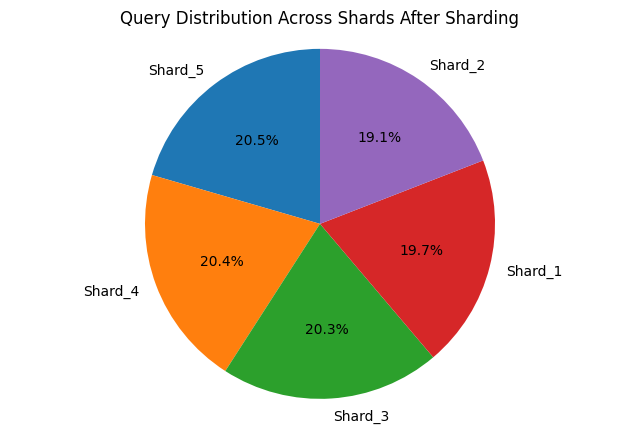

In [25]:
# Data Visualization: Shard Distribution After Sharding
plt.figure(figsize=(8, 5))
shard_counts = df_predictive_sharded['Shard ID'].value_counts()
plt.pie(shard_counts, labels=shard_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Query Distribution Across Shards After Sharding')
plt.axis('equal')
plt.show()

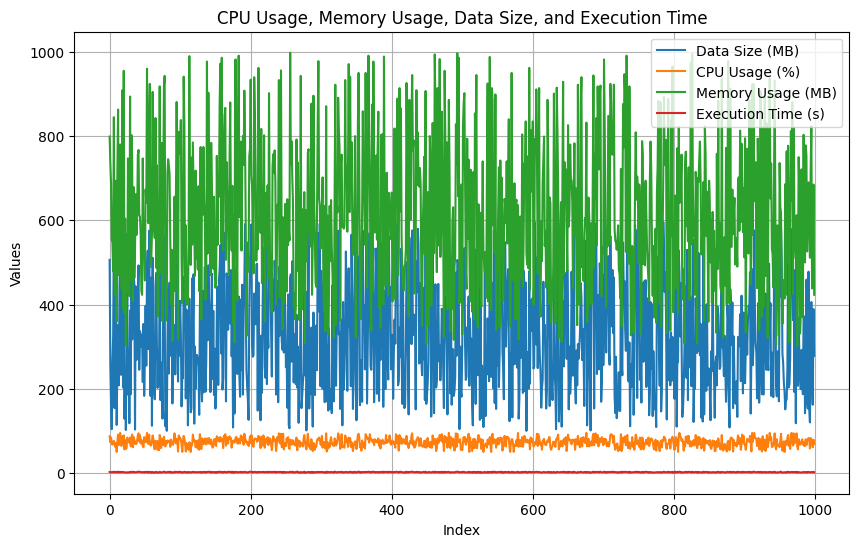

In [27]:
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame from the previous code
plt.figure(figsize=(10, 6))

plt.plot(df['Data Size (MB)'], label='Data Size (MB)')
plt.plot(df['CPU Usage (%)'], label='CPU Usage (%)')
plt.plot(df['Memory Usage (MB)'], label='Memory Usage (MB)')
plt.plot(df['Execution Time (s)'], label='Execution Time (s)')

plt.xlabel('Index') # or replace with a relevant x-axis label if you have one
plt.ylabel('Values')
plt.title('CPU Usage, Memory Usage, Data Size, and Execution Time')
plt.legend()
plt.grid(True)
plt.show()
